In [11]:
import networkx as nx 
import random
import matplotlib.pyplot as plt
import numpy as np 
import math 
import copy 
import graphviz
from scipy.optimize import fsolve
from typing import List
import sympy as sp
from sympy import Symbol
from collections import deque
import pickle
import lattpy as lp
import import_ipynb
from arrival_networkx import Arrival

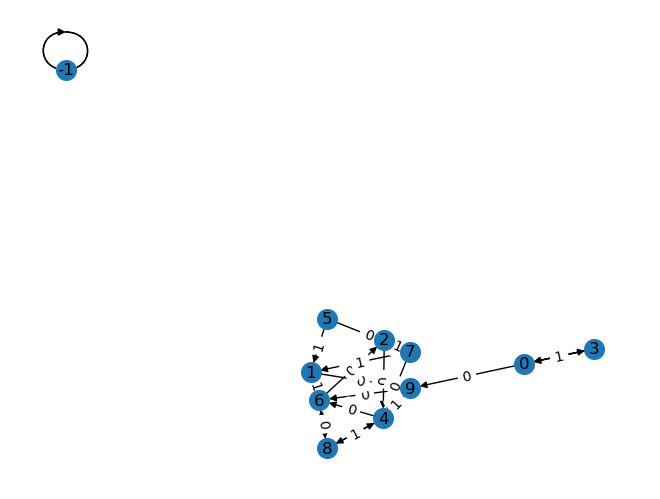

In [25]:
game = Arrival(10)
count = 0

In [51]:
def f(point):
    return game.evaluate(point)

def is_up_set_witness(a, u, f):
    f_a = f(a)
    f_u = f(u)
    return all(a[i] >= f_a[i] and u[i] >= f_u[i] for i in range(len(a)))

def is_down_set_witness(d, b, f):
    f_d = f(d)
    f_b = f(b)
    return all(d[i] <= f_d[i] and b[i] <= f_b[i] for i in range(len(d)))

def find_midpoint(a, b):
    return (a + b) // 2

def check_order_preservation(point1, point2, f):
    # Check if f violates order preservation between point1 and point2.
    f_p1 = f(point1)
    f_p2 = f(point2)
    return not all(f_p1[i] <= f_p2[i] for i in range(len(point1)))

def inner_algorithm(L, s, f):
    # L is the current sub-instance, represented by lower (a) and upper (b) bounds.
    # s is the principle slice (∗, ∗, s3).
    # f is the function being analyzed.
    

    a, b = L
    while True:
        print("innerloop")
        print(L)
        mid = find_midpoint(a, b)

        # Step 1: Check for up/down set witnesses and handle boundary conditions.
        if is_up_set_witness(a, mid, f):
            # Move to the next iteration with the sub-instance [mid, b].
            a = mid
        elif is_down_set_witness(mid, b, f):
            # Move to the next iteration with the sub-instance [a, mid].
            b = mid
        else:
            # Additional checks for special cases and order preservation violations.
            if check_order_preservation(a, mid, f) or check_order_preservation(mid, b, f):
                print("Order preservation violation found.")
                return None  # Terminate the algorithm.

        # Terminal phase: Check if the instance size is reduced sufficiently.
        if np.all(b - a <= 1):
            print("Terminal phase reached.")
            break

    # Return the final sub-instance containing a solution, or indicate a violation was found.
    return a, b

# Example usage:
# L = (np.array([0, 0, 0]), np.array([10, 10, 10]))  # Initial sub-instance bounds.
# s = (None, None, 5)  # Principle slice.
# result = inner_algorithm(L, s, f)
# print("Result:", result)


In [52]:
def outer_algorithm(f, n):
    """
    The outer algorithm for navigating a Tarski instance in a k-dimensional lattice.
    
    Args:
    - f: The function for which Tarski fixed points are being sought.
    - n: A list or numpy array representing the maximum bounds in each dimension of the lattice.
    
    Returns:
    - Final search space that either contains a solution or a subset where a solution exists.
    """
    # Initialize the search space
    k = len(n)  # Dimensionality of the problem
    x = np.ones(k, dtype=int)  # The least element in the lattice
    y = np.array(n)  # The greatest element in the lattice
    count = 0 # number of times inner algo was called 
    

    # Iteratively refine the search space
    while np.any(y - x >= 2):
        print(np.any(y - x >= 2))
        # Determine the dimension i with the largest gap between x and y
        i = np.argmax(y - x)
        
        # Create a principle slice s centered between x and y in the selected dimension
        s = np.full(k, np.nan, dtype=float)
        s[i] = x[i] + (y[i] - x[i]) // 2

        # Invoke the inner algorithm on the current sub-instance and principle slice
        La_b = (x.copy(), y.copy())
        print(count,La_b,s)
        result = inner_algorithm(La_b, s, f)
        count += 1
        print("here")
        
        
        # Check the result of the inner algorithm
        if result is None:
            print("An order preservation violation was found.")
            return None
        
        updated_a, updated_b = result
        
        # Update x and y to the refined sub-instance bounds
        x, y = updated_a, updated_b
        
        print("Refined bounds: x =", x, "y =", y)

    print("Final sub-instance reached with bounds: x =", x, ", y =", y)
    return x, y

# Example usage
n = [10*(2**10)] * 10  # Bounds in each dimension for the initial lattice
print(n)



[10240, 10240, 10240, 10240, 10240, 10240, 10240, 10240, 10240, 10240]


In [53]:
def fps(game):
    n = [game.n*(2**game.n)] *  game.n
    final_sub_instance = outer_algorithm(game.evaluate, n)
    print("Outcome:", final_sub_instance)
    
fps(game)

True
0 (array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528,
       22528, 22528])) [11264.    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan]
innerloop
(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528,
       22528, 22528]))
innerloop
(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528,
       22528, 22528]))
innerloop
(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528,
       22528, 22528]))
innerloop
(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528,
       22528, 22528]))
innerloop
(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528, 22528,
       22528, 22528]))
innerloop
(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

KeyboardInterrupt: 